# BERT-base-NER demo
* Notebook by Adam Lang
* Date: 6/4/2024
* In this notebook we will demo:
1. Pulling a model from Huggingface
2. Using the pre-trained BERT-based-NER model to perform named entity recognition
  * Model card from huggingface: https://huggingface.co/dslim/bert-base-NER

# Import libraries from huggingface

In [1]:
## libraries needed
from transformers import AutoTokenizer, AutoModelForTokenClassification

In [2]:
## pipeline from transformers
from transformers import pipeline

# Tokenizer

In [3]:
# tokenize for specific model
tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")

tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

# Model

In [4]:
## model from HF - dslim/bert-base-NER
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# Setup pipeline
* To instantiate the pipeline we need to set the parameters
  * "ner" (task)
  * model
  * tokenizer

In [5]:
classify = pipeline("ner",model=model, tokenizer=tokenizer)

# Get Data
* Let's use a random paragraph of text, looked up "Fentanyl" a potent opioid.

In [6]:
data = """Fentanyl is a highly potent synthetic piperidine opioid primarily used as an analgesic. It is 20 to 40 times more potent than heroin and 100 times more potent than morphine;[8] its primary clinical utility is in pain management for cancer patients and those recovering from painful surgeries.[9][10] Fentanyl is also used as a sedative.[11] Depending on the method of delivery, fentanyl can be very fast acting and ingesting a relatively small quantity can cause overdose.[12] Fentanyl works by activating μ-opioid receptors.[6] Fentanyl is sold under the brand names Actiq, Duragesic and Sublimaze, among others.[13]

Pharmaceutical fentanyl's adverse effects are identical to those of other narcotic opioids,[14] including addiction, confusion, respiratory depression (which, if extensive and untreated, may lead to arrest), drowsiness, nausea, visual disturbances, dyskinesia, hallucinations, delirium, a subset of the latter known as "narcotic delirium", narcotic ileus, muscle rigidity, constipation, loss of consciousness, hypotension, coma, and death.[11] Alcohol and other drugs (e.g., cocaine and heroin) can synergistically exacerbate fentanyl's side effects. Naloxone (also known as Narcan) can reverse the effects of an opioid overdose but because fentanyl is so potent multiple doses might be necessary.[13]

Fentanyl was first synthesized by Paul Janssen in 1959 and was approved for medical use in the United States in 1968.[6][15] In 2015, 1,600 kilograms (3,500 pounds) were used in healthcare globally.[16] As of 2017, fentanyl was the most widely used synthetic opioid in medicine;[17] in 2019, it was the 278th most commonly prescribed medication in the United States, with more than a million prescriptions.[18][19] It is on the World Health Organization's List of Essential Medicines.[20]

Fentanyl continues to fuel an epidemic of synthetic opioid drug overdose deaths in the United States. From 2011 to 2021, prescription opioid deaths per year remained stable, while synthetic opioid deaths per year increased from 2,600 overdoses to 70,601.[21] Since 2018, fentanyl and its analogues have been responsible for most drug overdose deaths in the United States, causing over 71,238 deaths in 2021.[22][21][23] Fentanyl constitutes the majority of all drug overdose deaths in the United States since it overtook heroin in 2018.[22] The United States National Forensic Laboratory estimates fentanyl reports by federal, state, and local forensic laboratories increased from 4,697 reports in 2014 to 117,045 reports in 2020.[24] Fentanyl is often mixed, cut, or ingested alongside other drugs, including cocaine and heroin.[24] Fentanyl has been reported in pill form, including pills mimicking pharmaceutical drugs such as oxycodone.[24] Mixing with other drugs or disguising as a pharmaceutical makes it difficult to determine the correct treatment in the case of an overdose, resulting in more deaths.[11] In an attempt to reduce the number of overdoses from taking other drugs mixed with fentanyl, drug testing kits, strips and labs are available.[25][26] Fentanyl's ease of manufacture and high potency makes it easier to produce and smuggle, resulting in fentanyl replacing other abused narcotics and becoming more widely used."""

## BERT-base-NER tags
* These are from Huggingface model card.

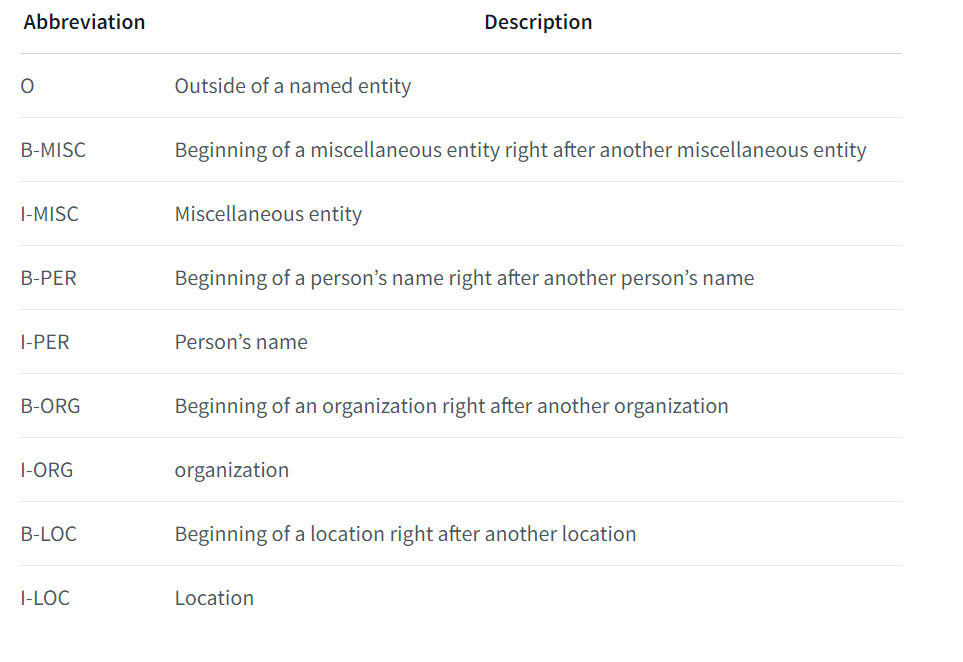

# Results

In [8]:
results = classify(data)

In [9]:
#print it out
results

[{'entity': 'B-ORG',
  'score': 0.4314586,
  'index': 1,
  'word': 'Fen',
  'start': 0,
  'end': 3},
 {'entity': 'B-MISC',
  'score': 0.52266455,
  'index': 71,
  'word': 'Fen',
  'start': 300,
  'end': 303},
 {'entity': 'I-MISC',
  'score': 0.4686133,
  'index': 72,
  'word': '##tany',
  'start': 303,
  'end': 307},
 {'entity': 'B-MISC',
  'score': 0.48353127,
  'index': 119,
  'word': 'Fen',
  'start': 477,
  'end': 480},
 {'entity': 'I-MISC',
  'score': 0.56590164,
  'index': 120,
  'word': '##tany',
  'start': 480,
  'end': 484},
 {'entity': 'B-MISC',
  'score': 0.5027376,
  'index': 136,
  'word': 'Fen',
  'start': 529,
  'end': 532},
 {'entity': 'I-MISC',
  'score': 0.5820522,
  'index': 137,
  'word': '##tany',
  'start': 532,
  'end': 536},
 {'entity': 'B-MISC',
  'score': 0.72914165,
  'index': 145,
  'word': 'Act',
  'start': 568,
  'end': 571},
 {'entity': 'I-MISC',
  'score': 0.40615112,
  'index': 146,
  'word': '##iq',
  'start': 571,
  'end': 573},
 {'entity': 'B-ORG',
 

# Put results into a dataframe

In [12]:
import pandas as pd
df = pd.DataFrame(results)

In [13]:
df.head()

,entity,score,index,word,start,end
0,B-ORG,0.431459,1,Fen,0,3
1,B-MISC,0.522665,71,Fen,300,303
2,I-MISC,0.468613,72,##tany,303,307
3,B-MISC,0.483531,119,Fen,477,480
4,I-MISC,0.565902,120,##tany,480,484


In [14]:
## lets look at the scores in a histogram
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [22]:
# before we plot lets look at entities
df.entity.value_counts()

entity
I-MISC    8
B-MISC    7
B-ORG     3
I-PER     2
B-LOC     2
I-LOC     2
B-PER     1
Name: count, dtype: int64

Looks like miscellaneous is the most common entity. Lets look closer.

In [23]:
df[df['entity']=='I-MISC']

,entity,score,index,word,start,end
2,I-MISC,0.468613,72,##tany,303,307
4,I-MISC,0.565902,120,##tany,480,484
6,I-MISC,0.582052,137,##tany,532,536
8,I-MISC,0.406151,146,##iq,571,573
10,I-MISC,0.482118,150,##si,581,583
12,I-MISC,0.434400,155,##az,595,597
13,I-MISC,0.409239,156,##e,597,598
17,I-MISC,0.607296,367,##tany,1325,1329


* The fault here is that BERT will use its subword tokenizer and the miscelleneous tokens are just parts of the word fentanyl.
* However, we also need to put this in context, that the "I" masks are "inside" a word versus "B" which is before.

In [24]:
# lets look at B-MISC as this was the most common before mask
df[df['entity']=='B-MISC']

,entity,score,index,word,start,end
1,B-MISC,0.522665,71,Fen,300,303
3,B-MISC,0.483531,119,Fen,477,480
5,B-MISC,0.502738,136,Fen,529,532
7,B-MISC,0.729142,145,Act,568,571
14,B-MISC,0.603478,324,Na,1170,1172
15,B-MISC,0.755304,332,Na,1194,1196
16,B-MISC,0.571125,366,Fen,1322,1325


Obviously this BERT model is not a medical specific model so its not going to predict medical terms very well and this is medical heavy text. We will have to compare these results to a medical BERT model.

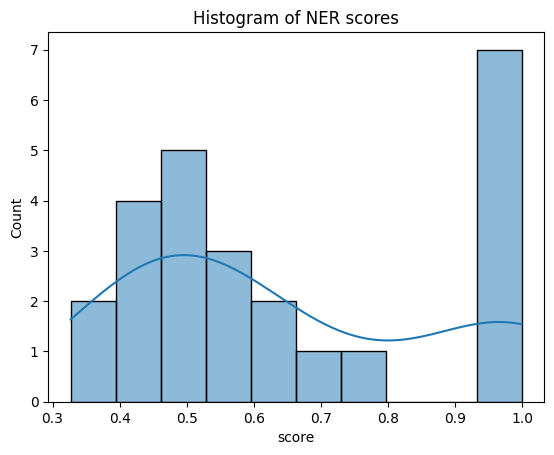

In [31]:
## now plot the NER scores
sns.histplot(x='score',data=df,bins=10,kde=True).set(title='Histogram of NER scores')
plt.show();

Summary
* We can see that most of the distribution of the NER scores predictions are below 0.6 which obviously tells us that the model did a poor job of named entity recognition on unseen data.
* We will have to retest this on a medical specific model.